<a href="https://colab.research.google.com/github/Foysal440/Stress-analysis/blob/main/Stress_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [85]:

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'student-stress-factors-a-comprehensive-analysis:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F3858024%2F6690715%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240827%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240827T002726Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D63cfad99e03c79d4e7bfbd0ada8ab2a38788e00b98c786fc739d9aaf8040708896bce9a7e89a65a3d181ed83d4e7e8ecfaf881291d16a2e2ba406cda6ff7f574453aae6bf668cba80bc6b210e5c14a1e39707ece438fe6867e1616d19e5509714bf67536a1c18c7500878f40c40b77af42f23a8f30312dcb61bb6d447f1ca33da161795c206dc7fd1ef4c0d68b7016588aba50d98fc0954ecd266f119e006866cbdba6cbc43c35fb40c7ac1ac1ff9dd93e02efc5a37835c98e3f3669a7674da638c366cbfe4f427bc37df5a31b20bfa83c8f0479681e691d13a37a8772ed89e9c0667a5606f74e52ab5892e3caf58b16efa75afd52ba6c014d863858a40f9245'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 12021 bytes downloaded
Downloaded and uncompressed: student-stress-factors-a-comprehensive-analysis
Data source import complete.


In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Import dataset**

In [104]:
df = pd.read_csv("/kaggle/input/student-stress-factors-a-comprehensive-analysis/StressLevelDataset.csv")

# Descriptive Statistics
1) How many students are in the dataset?
2) What is the average anxiety level of students in the dataset?
3) How many students have reported a history of mental health issues?

In [88]:
# 1
num_students = len(df)

# 2
average_anxiety_level = df['anxiety_level'].mean()

# 3
students_with_mental_health_history = df[df['mental_health_history'] == 1]
num_students_with_mental_health_history = len(students_with_mental_health_history)

print("1) Number of students in the dataset:", num_students)
print("2) Average anxiety level of students:", average_anxiety_level)
print("3) Number of students with a history of mental health issues:", num_students_with_mental_health_history)

1) Number of students in the dataset: 1100
2) Average anxiety level of students: 11.063636363636364
3) Number of students with a history of mental health issues: 542


<ipython-input-89-5513bf70a1ad>:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=factors, y=negative_experiences, palette=colors)


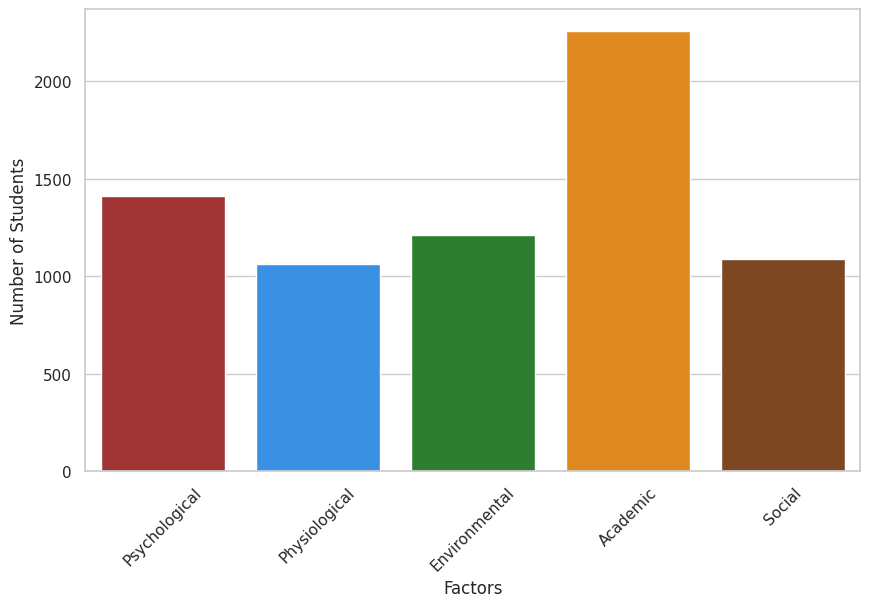

In [89]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the relevant columns
psychological_factors = ['anxiety_level', 'self_esteem', 'mental_health_history', 'depression']
physiological_factors = ['headache', 'blood_pressure', 'sleep_quality', 'breathing_problem']
environmental_factors = ['noise_level', 'living_conditions', 'safety', 'basic_needs']
academic_factors = ['academic_performance', 'study_load', 'teacher_student_relationship', 'future_career_concerns']
social_factors = ['social_support', 'peer_pressure', 'extracurricular_activities', 'bullying']

# Calculate the number of students with negative experiences or conditions for each factor
num_students_with_negative_psychological = df[psychological_factors].apply(lambda x: x.lt(3).sum(), axis=1)
num_students_with_negative_physiological = df[physiological_factors].apply(lambda x: x.gt(3).sum(), axis=1)
num_students_with_negative_environmental = df[environmental_factors].apply(lambda x: x.gt(3).sum(), axis=1)
num_students_with_negative_academic = df[academic_factors].apply(lambda x: x.lt(3).sum(), axis=1)
num_students_with_negative_social = df[social_factors].apply(lambda x: x.gt(3).sum(), axis=1)

# Create a bar chart for the number of students with various negative experiences or conditions
factors = ['Psychological', 'Physiological', 'Environmental', 'Academic', 'Social']
negative_experiences = [
    num_students_with_negative_psychological.sum(),
    num_students_with_negative_physiological.sum(),
    num_students_with_negative_environmental.sum(),
    num_students_with_negative_academic.sum(),
    num_students_with_negative_social.sum()
]

# Deeper custom colors for each bar
colors = ['#B22222', '#1E90FF', '#228B22', '#FF8C00', '#8B4513']

plt.figure(figsize=(10, 6))
sns.barplot(x=factors, y=negative_experiences, palette=colors)
plt.xlabel("Factors")
plt.ylabel("Number of Students")
plt.xticks(rotation=45)

# Save with 300 DPI resolution
plt.savefig('bar_chart_300dpi.png', dpi=300)

plt.show()


# Psychological Factors
1) How many students have a self-esteem level below the average?
2) What percentage of students have reported experiencing depression?

In [90]:
# 1
average_self_esteem = df['self_esteem'].mean()
students_below_average_self_esteem = df[df['self_esteem'] < average_self_esteem]
num_students_below_average_self_esteem = len(students_below_average_self_esteem)


# 2
percentage_students_experiencing_depression = (df['depression'].sum() / num_students) * 100

print("1) Number of students with self-esteem below the average:", num_students_below_average_self_esteem)
print(f"2) Percentage of students experiencing depression: {percentage_students_experiencing_depression:.2f}%")

1) Number of students with self-esteem below the average: 507
2) Percentage of students experiencing depression: 1255.55%


In order to have the percentage of students experience depression in a logical scale which is more understandable, we can set a threshold and create a new binary column

In [91]:
# Define the threshold and create the new binary column
threshold = 10
df['depression_binary'] = (df['depression'] > threshold).astype(int)

# Ensure 'num_students' is defined. If not, define it.
if 'num_students' not in locals():
    num_students = len(df)


percentage_students_experiencing_depression = (df['depression_binary'].sum() / num_students) * 100

print(f"2) Percentage of students experiencing depression: {percentage_students_experiencing_depression:.2f}%")

2) Percentage of students experiencing depression: 56.36%


# Physiological Factors
1) How many students experience headaches frequently?
2) What is the average blood pressure reading among the students?
3) How many students rate their sleep quality as poor?

In [92]:
# 1
students_with_frequent_headaches = df[df['headache'] == 1]
num_students_with_frequent_headaches = len(students_with_frequent_headaches)

# 2
average_blood_pressure = df['blood_pressure'].mean()

# 3
students_with_poor_sleep_quality = df[df['sleep_quality'] < 3]
num_students_with_poor_sleep_quality = len(students_with_poor_sleep_quality)

print("1) Number of students experiencing frequent headaches:", num_students_with_frequent_headaches)
print("2) Average blood pressure reading among the students:", average_blood_pressure)
print("3) Number of students with poor sleep quality:", num_students_with_poor_sleep_quality)

1) Number of students experiencing frequent headaches: 331
2) Average blood pressure reading among the students: 2.1818181818181817
3) Number of students with poor sleep quality: 550


# Environmental Factors
1) How many students live in conditions with high noise levels?
2) What percentage of students feel unsafe in their living conditions?
3) How many students have reported not having their basic needs met?

In [93]:
# 1
students_in_high_noise_conditions = df[df['noise_level'] > 3]
num_students_in_high_noise_conditions = len(students_in_high_noise_conditions)

# 2
percentage_students_feeling_unsafe = (df['safety'].sum() / num_students) * 100

# 3
students_without_basic_needs = df[df['basic_needs'] == 0]
num_students_without_basic_needs = len(students_without_basic_needs)

print("1) Number of students living in high noise conditions:", num_students_in_high_noise_conditions)
print("2) Percentage of students feeling unsafe in their living conditions:", percentage_students_feeling_unsafe)
print("3) Number of students without their basic needs met:", num_students_without_basic_needs)

1) Number of students living in high noise conditions: 274
2) Percentage of students feeling unsafe in their living conditions: 273.72727272727275
3) Number of students without their basic needs met: 40


In order to have the Percentage of students feeling unsafe in their living conditions in a logical scale which is more understandable, we can set a threshold and create a new binary column (Like earlier we've created a column for depression)

In [94]:
# Create a binary column for safety (1 indicates feeling unsafe, 0 indicates feeling safe)
threshold_for_safety = 2
df['feeling_unsafe'] = (df['safety'] <= threshold_for_safety).astype(int)


percentage_students_feeling_unsafe = (df['feeling_unsafe'].sum() / num_students) * 100

print(f"2) Percentage of students feeling unsafe in their living conditions: {percentage_students_feeling_unsafe:.2f}%")

2) Percentage of students feeling unsafe in their living conditions: 51.36%


# Academic Factors
1) How many students rate their academic performance as below average?
2) What is the average study load reported by students?
3) How many students have concerns about their future careers?

In [95]:
# 1
students_below_average_academic_performance = df[df['academic_performance'] < 3]
num_students_below_average_academic_performance = len(students_below_average_academic_performance)

# 2
average_study_load = df['study_load'].mean()

# 3
students_with_future_career_concerns = df[df['future_career_concerns'] == 1]
num_students_with_future_career_concerns = len(students_with_future_career_concerns)

print("1) Number of students with below-average academic performance:", num_students_below_average_academic_performance)
print("2) Average study load reported by students:", average_study_load)
print("3) Number of students with concerns about their future careers:", num_students_with_future_career_concerns)

1) Number of students with below-average academic performance: 561
2) Average study load reported by students: 2.6218181818181816
3) Number of students with concerns about their future careers: 327


# Social Factors
1) How many students feel they have strong social support?
2) What percentage of students have experienced bullying?
3) How many students participate in extracurricular activities?

In [96]:
# 1
students_with_strong_social_support = df[df['social_support'] > 3]
num_students_with_strong_social_support = len(students_with_strong_social_support)

# 2
percentage_students_experiencing_bullying = (df['bullying'].sum() / num_students) * 100

# 3
students_participating_in_extracurricular = df[df['extracurricular_activities'] == 1]
num_students_participating_in_extracurricular = len(students_participating_in_extracurricular)

print("1) Number of students with strong social support:", num_students_with_strong_social_support)
print("2) Percentage of students experiencing bullying:", percentage_students_experiencing_bullying)
print("3) Number of students participating in extracurricular activities:", num_students_participating_in_extracurricular)

1) Number of students with strong social support: 0
2) Percentage of students experiencing bullying: 261.72727272727275
3) Number of students participating in extracurricular activities: 184


In order to have the Percentage of students experiencing bullying in a logical scale which is more understandable, we can set a threshold and create a new binary column (Like earlier we've created a column for depression)

In [97]:
# Define the threshold and create the new binary column for bullying
bullying_threshold = 3
df['bullying_binary'] = (df['bullying'] > bullying_threshold).astype(int)

# Ensure 'num_students' is defined. If not, define it.
if 'num_students' not in locals():
    num_students = len(df)

# Compute the percentage using the new binary column
percentage_students_experiencing_bullying = (df['bullying_binary'].sum() / num_students) * 100

print(f"2) Percentage of students experiencing bullying: {percentage_students_experiencing_bullying:.2f}%")

2) Percentage of students experiencing bullying: 32.73%


# Comparative Analysis
1) Is there a correlation between anxiety level and academic performance?
2) Do students with poor sleep quality also report higher levels of depression?
3) Are students who experience bullying more likely to have a history of mental health issues?

In [98]:
# 1
correlation_anxiety_academic = df['anxiety_level'].corr(df['academic_performance'])

# 2
correlation_sleep_depression = df['sleep_quality'].corr(df['depression'])

# 3
students_with_bullying_history = df[df['bullying'] == 1]
students_with_bullying_history_and_mental_health_history = students_with_bullying_history[
    students_with_bullying_history['mental_health_history'] == 1]
percentage_students_with_bullying_and_mental_health_history = (
    len(students_with_bullying_history_and_mental_health_history) / len(students_with_bullying_history)) * 100

print("1) Correlation between anxiety level and academic performance:", correlation_anxiety_academic)
print("2) Correlation between sleep quality and depression:", correlation_sleep_depression)
print("3) Percentage of students with bullying history and mental health history:", percentage_students_with_bullying_and_mental_health_history)

1) Correlation between anxiety level and academic performance: -0.6496011296145091
2) Correlation between sleep quality and depression: -0.6931609071393333
3) Percentage of students with bullying history and mental health history: 4.179104477611941


# General Exploration
1) Which factor (Psychological, Physiological, Environmental, Academic, Social) has the highest number of students reporting negative experiences or conditions?
2) Are there any noticeable trends or patterns when comparing different factors?
3) Which specific feature within each factor has the most significant impact on student stress, based on the dataset?

In [99]:
# 1

factors = ['Psychological', 'Physiological', 'Environmental', 'Academic', 'Social']
negative_experiences = [num_students_below_average_self_esteem,
                        num_students_with_frequent_headaches,
                        num_students_in_high_noise_conditions,
                        num_students_without_basic_needs,
                        len(students_with_bullying_history)]
factor_with_most_negatives = factors[negative_experiences.index(max(negative_experiences))]

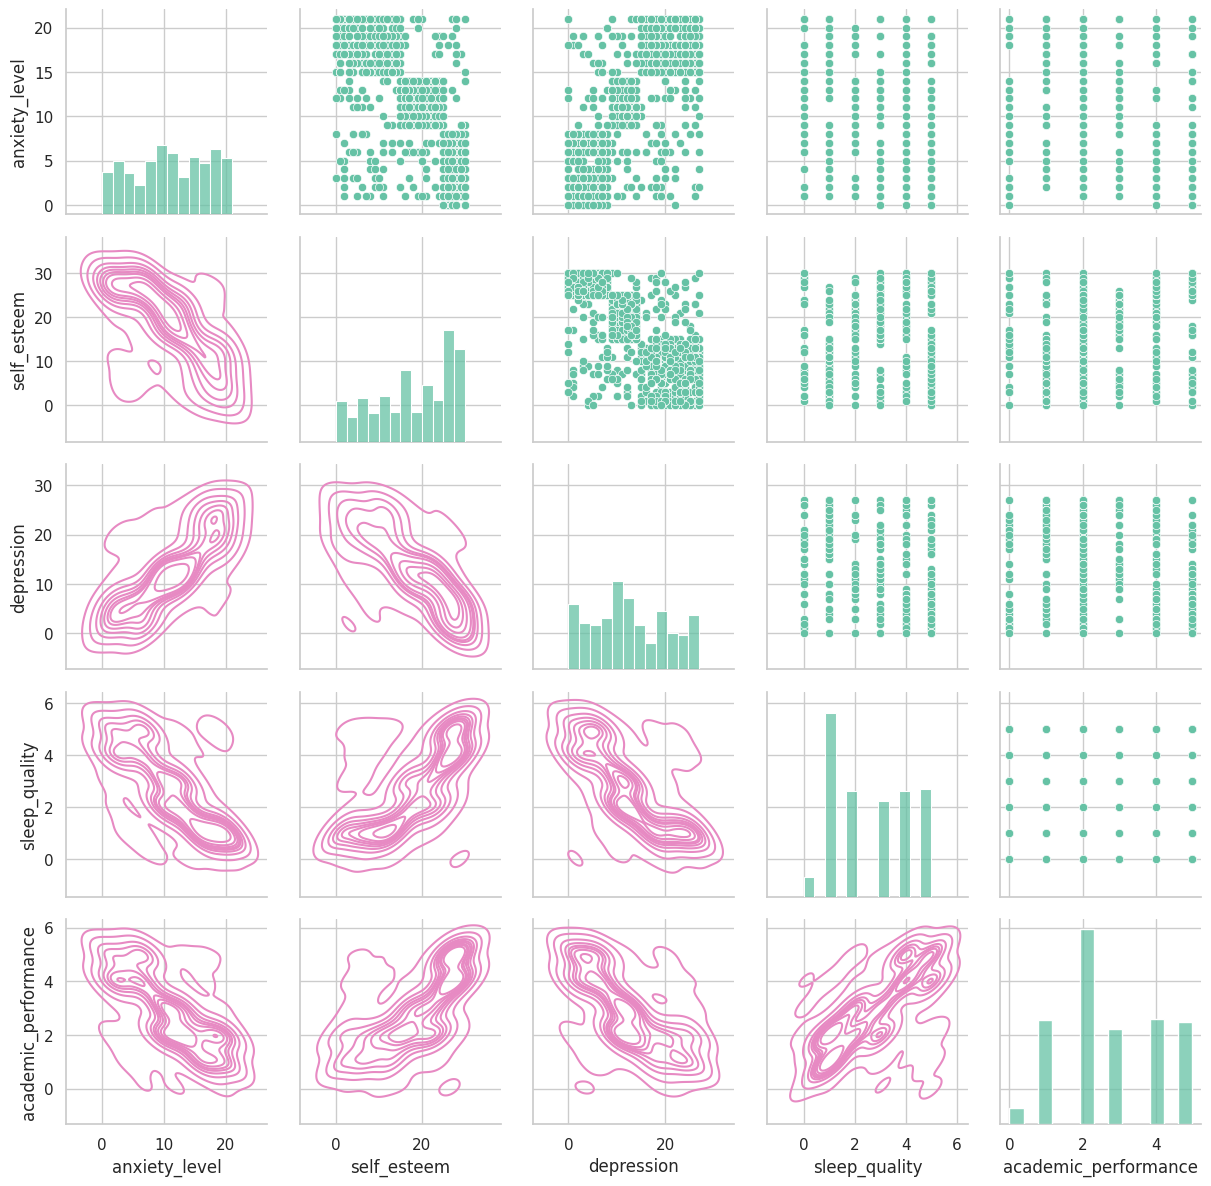

Factor: Psychological
- Feature: anxiety_level, Importance: 0.2370817974909638
- Feature: self_esteem, Importance: 0.5730392198446205
- Feature: mental_health_history, Importance: 0.019758500830699972
- Feature: depression, Importance: 0.17012048183371575

Factor: Physiological
- Feature: headache, Importance: 0.3894232920329817
- Feature: blood_pressure, Importance: 0.047105401118673305
- Feature: sleep_quality, Importance: 0.4929593080492448
- Feature: breathing_problem, Importance: 0.0705119987991002

Factor: Environmental
- Feature: noise_level, Importance: 0.15757984063503797
- Feature: living_conditions, Importance: 0.12451900689382497
- Feature: safety, Importance: 0.24142432165353178
- Feature: basic_needs, Importance: 0.4764768308176053

Factor: Academic
- Feature: academic_performance, Importance: 0.43851246383082915
- Feature: study_load, Importance: 0.10429260162259195
- Feature: teacher_student_relationship, Importance: 0.1967123749508822
- Feature: future_career_concerns,

<Figure size 640x480 with 0 Axes>

In [100]:
# 2&3

# Set a custom style for the plot
sns.set(style="whitegrid", palette="Set2")


factors_to_plot = df[['anxiety_level', 'self_esteem', 'depression', 'sleep_quality', 'academic_performance']]

g = sns.PairGrid(factors_to_plot)
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot, colors="C3")
g.map_diag(sns.histplot, kde_kws={'color': 'C2'})


plt.subplots_adjust(top=0.95)
g.fig.suptitle("", size=16)

# Show the plot
plt.show()



# use perform feature importance analysis To determine which specific feature within each factor has the most significant impact.

from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel

# Define factors
factors = ['Psychological', 'Physiological', 'Environmental', 'Academic', 'Social']

# Define feature sets for each factor

psychological_features = ['anxiety_level', 'self_esteem', 'mental_health_history', 'depression']
physiological_features = ['headache', 'blood_pressure', 'sleep_quality', 'breathing_problem']
environmental_features = ['noise_level', 'living_conditions', 'safety', 'basic_needs']
academic_features = ['academic_performance', 'study_load', 'teacher_student_relationship', 'future_career_concerns']
social_features = ['social_support', 'peer_pressure', 'extracurricular_activities', 'bullying']

# Initialize a Random Forest Regressor
model = RandomForestRegressor()


feature_importance = {}

# Loop through each factor and analyze feature importance

for factor, features in zip(factors, [psychological_features, physiological_features, environmental_features, academic_features, social_features]):
    X = df[features]
    y = df['stress_level']

    model.fit(X, y)

    # Get feature importances
    importance = model.feature_importances_


    # Store feature importances in the dictionary

    feature_importance[factor] = {feature: importance_value for feature, importance_value in zip(features, importance)}

# Save with 300 DPI resolution
plt.savefig('bar_chart_300dpi.png', dpi=300)

    # Print the feature importance for each factor

for factor, importance_dict in feature_importance.items():
    print(f"Factor: {factor}")
    for feature, importance_value in importance_dict.items():
        print(f"- Feature: {feature}, Importance: {importance_value}")
    print()

# Correlation Heatmap of Key Factors
create a heatmap to visualize correlations between key factors. This helps you identify strong positive or negative relationships

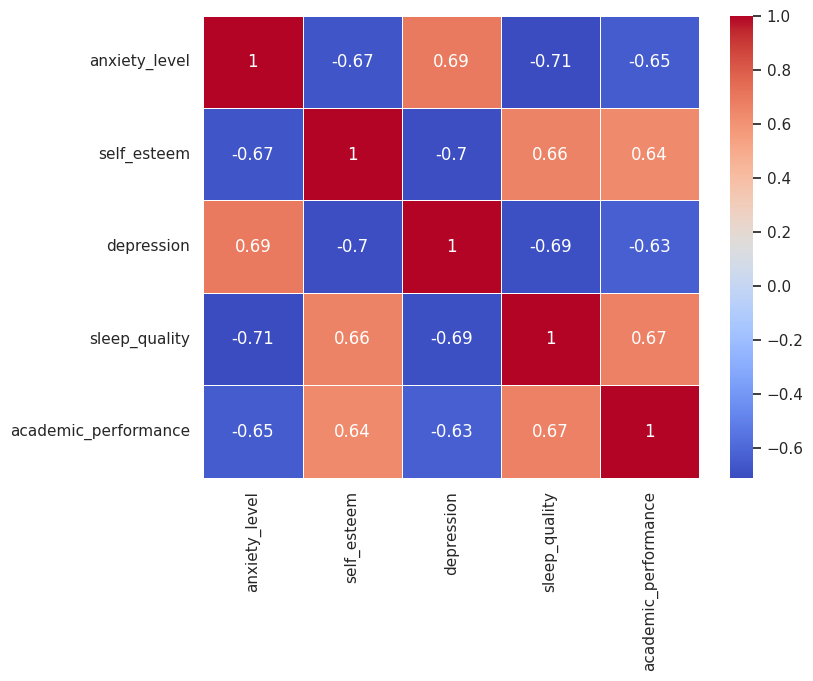

In [101]:
correlation_matrix = df[['anxiety_level', 'self_esteem', 'depression', 'sleep_quality', 'academic_performance']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
# Save with 300 DPI resolution
plt.savefig('bar_chart_300dpi.png', dpi=300)
plt.title("")
plt.show()

# Box Plots
use box plots to identify trends and variations in factors. This is useful for comparing distributions

<ipython-input-102-5a0d429aca16>:9: UserWarning: The palette list has more values (24) than needed (5), which may not be intended.
  sns.boxplot(


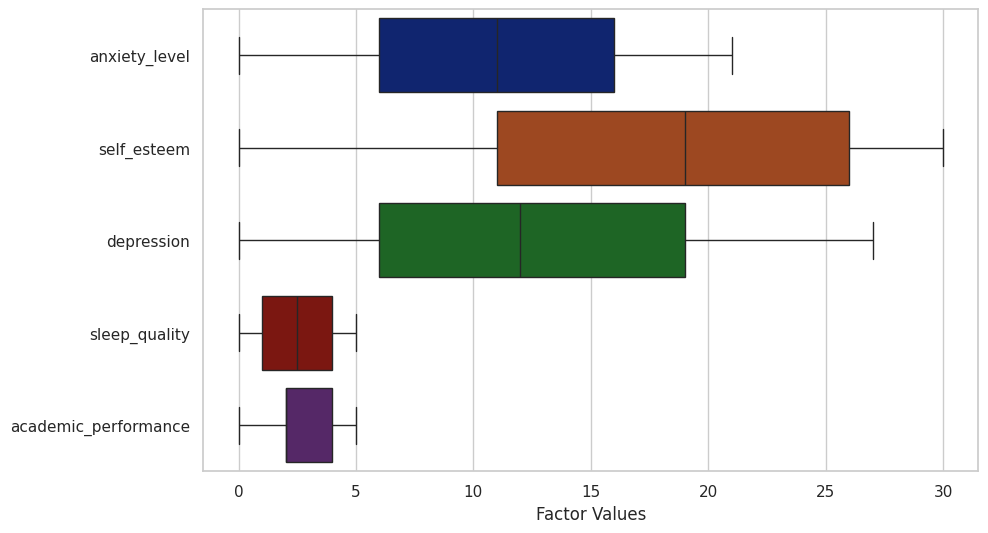

In [102]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))

# Use a deeper color palette for the boxplot
colors = sns.color_palette("dark", len(df.columns))

sns.boxplot(
    data=df[['anxiety_level', 'self_esteem', 'depression', 'sleep_quality', 'academic_performance']],
    orient='h',
    palette=colors
)

plt.xlabel("Factor Values")

# Save with 300 DPI resolution
plt.savefig('boxplot_300dpi.png', dpi=300)
plt.show()


# Determining Specific Feature Impact
To visualize feature importance within each factor, create bar charts for each factor's features.

<ipython-input-106-231984320a73>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importance, y=features, palette=colors, orient='h')


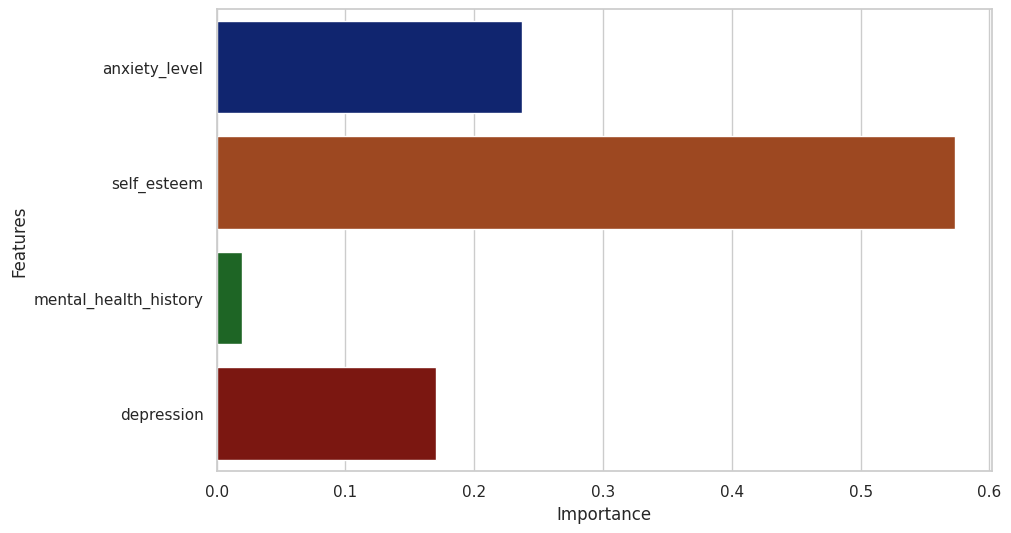

<ipython-input-106-231984320a73>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importance, y=features, palette=colors, orient='h')


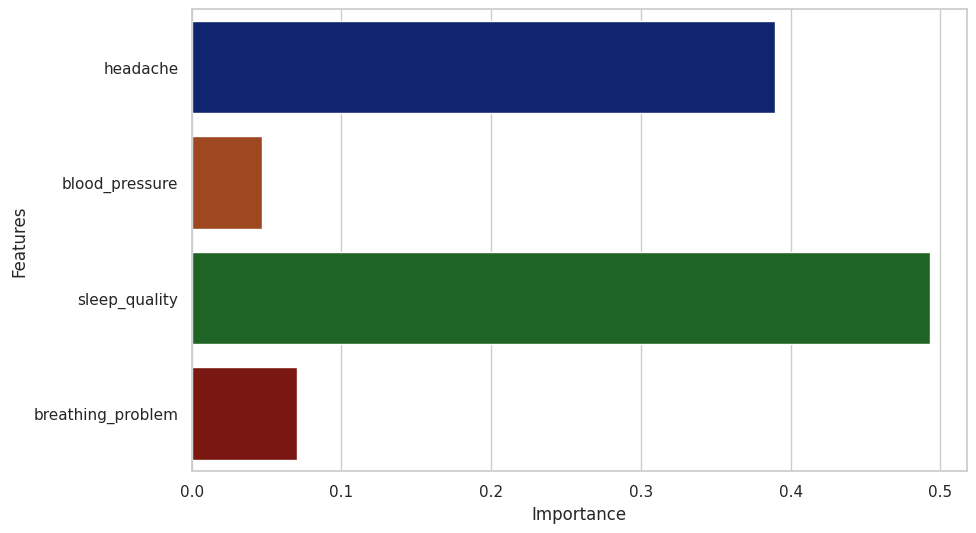

<ipython-input-106-231984320a73>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importance, y=features, palette=colors, orient='h')


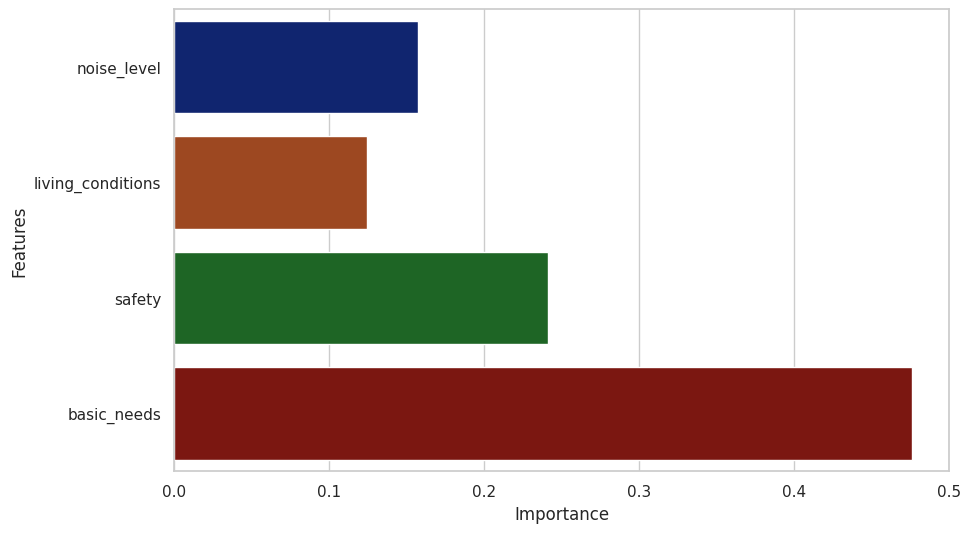

<ipython-input-106-231984320a73>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importance, y=features, palette=colors, orient='h')


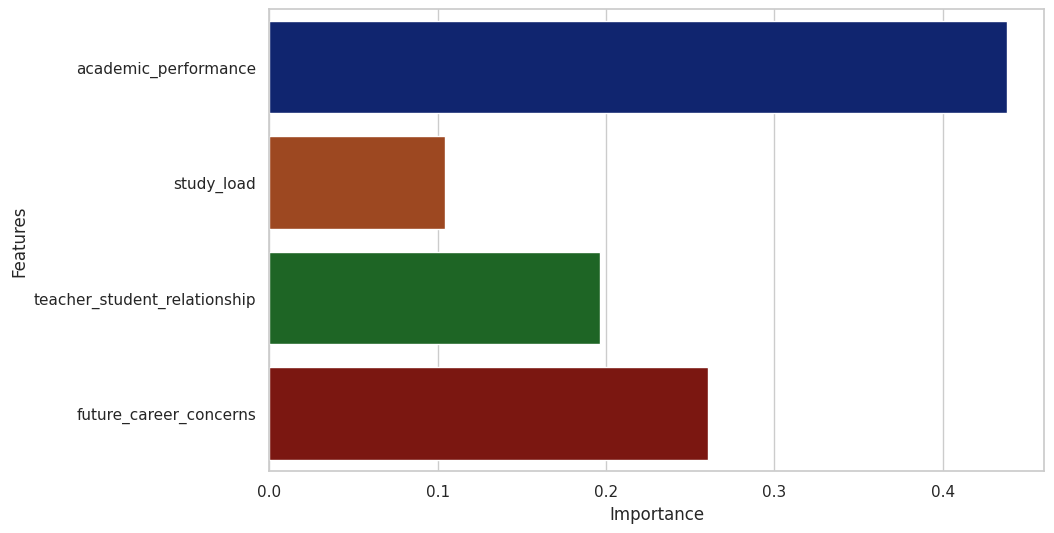

<ipython-input-106-231984320a73>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importance, y=features, palette=colors, orient='h')


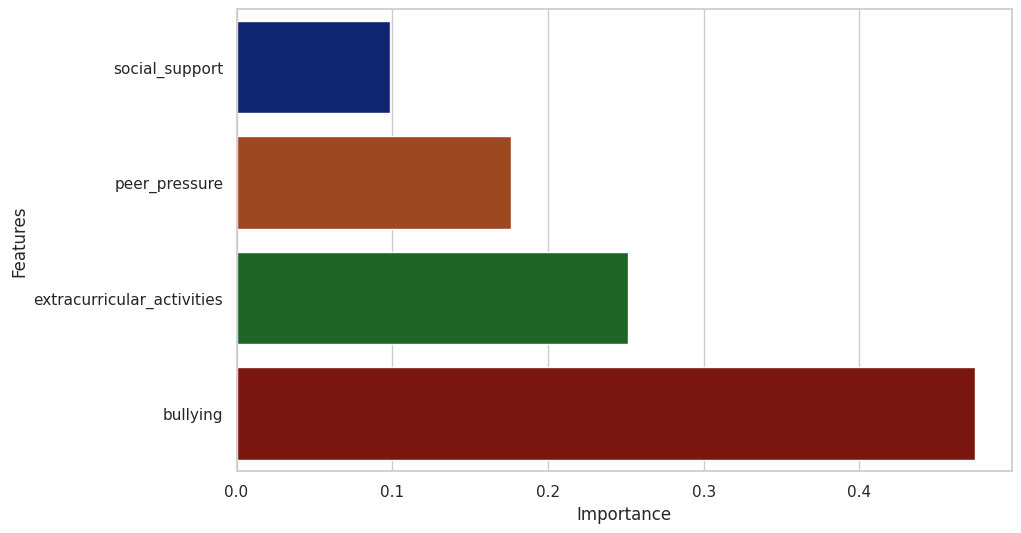

In [106]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming feature_importance is a dictionary or DataFrame with the required data

# Define feature importance for each factor
psychological_feature_importance = feature_importance['Psychological']
physiological_feature_importance = feature_importance['Physiological']
environmental_feature_importance = feature_importance['Environmental']
academic_feature_importance = feature_importance['Academic']
social_feature_importance = feature_importance['Social']

# Create bar charts for feature importance within each factor
def plot_feature_importance(factor_name, importance_dict):
    features = list(importance_dict.keys())
    importance = list(importance_dict.values())

    # Deeper color palette
    colors = sns.color_palette("dark", len(features))

    plt.figure(figsize=(10, 6))
    sns.barplot(x=importance, y=features, palette=colors, orient='h')
    plt.title(f"")
    plt.xlabel("Importance")
    plt.ylabel("Features")
    plt.show()

plot_feature_importance('Psychological', psychological_feature_importance)
plot_feature_importance('Physiological', physiological_feature_importance)
plot_feature_importance('Environmental', environmental_feature_importance)
plot_feature_importance('Academic', academic_feature_importance)
plot_feature_importance('Social', social_feature_importance)


# **k-Fold Cross-Validation**

For k-fold cross-validation, you would typically use the cross_val_score or cross_validate function from the scikit-learn library.

In [107]:
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.ensemble import RandomForestClassifier

# Assuming you have defined X (features) and y (labels)

# Initialize the Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Perform k-fold cross-validation (e.g., with 5 folds)
cv_scores = cross_val_score(rf, X, y, cv=5)

# Output the mean and standard deviation of the cross-validation scores
print(f"Cross-Validation Accuracy: {cv_scores.mean()} (+/- {cv_scores.std() * 2})")


Cross-Validation Accuracy: 0.8809090909090909 (+/- 0.031701083225750396)


# **Permutation Importance**
Permutation importance is calculated using the permutation_importance function from scikit-learn.

In [108]:
from sklearn.inspection import permutation_importance

# Fit the model on the entire dataset
rf.fit(X, y)

# Calculate permutation importance
perm_importance = permutation_importance(rf, X, y, n_repeats=10, random_state=42)

# Output the importance of each feature
for i in perm_importance.importances_mean.argsort()[::-1]:
    print(f"{X.columns[i]}: {perm_importance.importances_mean[i]:.4f} +/- {perm_importance.importances_std[i]:.4f}")


bullying: 0.4707 +/- 0.0136
social_support: 0.2248 +/- 0.0095
peer_pressure: 0.1952 +/- 0.0097
extracurricular_activities: 0.1939 +/- 0.0075
